# APO Lab 4 Operacje morfologiczne i szkieletyzacja

In [23]:
#from google.colab.patches import cv2_imshow
import cv2
import numpy as np
from matplotlib import pyplot as plt

!WAŻNE! Aby poniższy plik działał na Google Colab, należy wgrać plik 'A1_result.bmp'. Z panelu po lewej stronie wybieramy ikonę folderu ('Files') a następnie 'Upload' i wybieramy zdjęcie (wcześniej ściągnięte na dysk twardy z UBI).

# Zadanie 1   Algorytmy i aplikacje realizujące operacje morfologii matematycznej

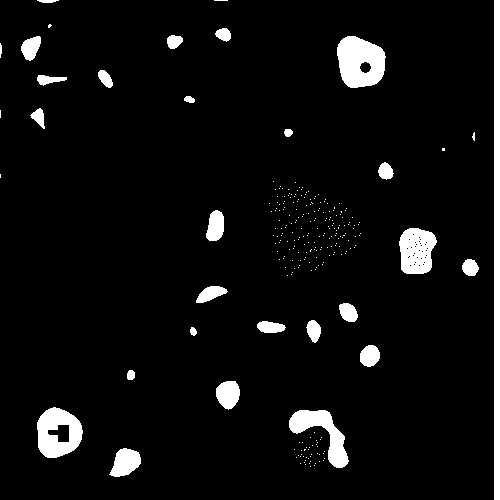

In [24]:
# Wczytanie obrazu pierwotnego
img = cv2.imread('A1_result.bmp', cv2.IMREAD_GRAYSCALE)
#cv2_imshow(img)
#plt.figure(figsize=(10,10))
plt.imshow(img)

## Elementy struturalne
Właściwości filtrów morfologicznych określane są przez tzw. element strukturalny, wykorzystywany jako ruchome okno. Określony jest względem wybranego piksela, tzw. punktu centralnego lub początkowego. Dla ułatwienia przyjmuje się standardowo za punkt początkowy środkowy piksel okna. Z tego też względu rozmiar elementu struktualnego powinien być liczbą nieparzystą.

In [25]:
# element strukturalny o kształcie kwadratu 5x5
cv2.getStructuringElement(cv2.MORPH_RECT,(5,5))

array([[1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1]], dtype=uint8)

In [26]:
# element strukturalny o kształcie prostokąta 2x3
cv2.getStructuringElement(cv2.MORPH_RECT,(2,3))

array([[1, 1],
       [1, 1],
       [1, 1]], dtype=uint8)

In [27]:
# element strukturalny o kształcie elipsy 3x3 (bardzo zgrubne przybliżenie, takie same jak romb)
cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3))

array([[0, 1, 0],
       [1, 1, 1],
       [0, 1, 0]], dtype=uint8)

In [28]:
# element strukturalny o kształcie elipsy 5x5 (już wyraźnie widać kształt eliptyczny)
cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5))

array([[0, 0, 1, 0, 0],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [0, 0, 1, 0, 0]], dtype=uint8)

In [29]:
# element strukturalny o kształcie krzyża 5x5 
cv2.getStructuringElement(cv2.MORPH_CROSS,(5,5))

array([[0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0],
       [1, 1, 1, 1, 1],
       [0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0]], dtype=uint8)

Element strukturalny o kształcie rombu nie jest zaimplementowany w OpenCV, natomiast dość łatwo można to zrobic samemu. Poniżej implementacja definująca romb o zadanym promieniu (licząc z pominięciem punktu centralnego).

In [30]:
def diamond(r):
    return np.uint8(np.add.outer(*[np.r_[:r,r:-1:-1]]*2)>=r)

In [31]:
diamond(2)

array([[0, 0, 1, 0, 0],
       [0, 1, 1, 1, 0],
       [1, 1, 1, 1, 1],
       [0, 1, 1, 1, 0],
       [0, 0, 1, 0, 0]], dtype=uint8)

In [32]:
diamond(3)

array([[0, 0, 0, 1, 0, 0, 0],
       [0, 0, 1, 1, 1, 0, 0],
       [0, 1, 1, 1, 1, 1, 0],
       [1, 1, 1, 1, 1, 1, 1],
       [0, 1, 1, 1, 1, 1, 0],
       [0, 0, 1, 1, 1, 0, 0],
       [0, 0, 0, 1, 0, 0, 0]], dtype=uint8)

## 1. a) erozja

Erozja jest jednym z podstawowych przekształceń morfologicznych. Erozja, czyli zwężanie, jest zastosowaniem różnicy Minkowskiego do obrazu. Jej działanie polega na obcinaniu brzegów obiektu na obrazie. Jeżeli choć jeden piksel z sąsiedztwa objętego przez kernel ma wartość równą zero, punkt centralny również otrzymuje wartość zero. W przeciwnym wypadku jego wartość nie ulega zmianie.

In [33]:
# ustawienie elementu strukturalnego (kernel) 
kernel = np.ones((5,5),np.uint8)
# wykonanie erozji morfologicznej przy użyciu zdefiniowanego elementu strukturalnego 
img_erode = cv2.erode(img, kernel, iterations = 2, borderType = cv2.BORDER_REPLICATE)
# w tym przypadku wykonujemy dwie iteracje czyli powtarzamy wykonanie tej operacji, dla bardziej wyrażnego rezultatu
# podobnie jak wprzypadku operacji sąsiedztwa z Lab3 mozemy podać argument borderType określjący przetwarzanie pikseli na krawędziach obrazu

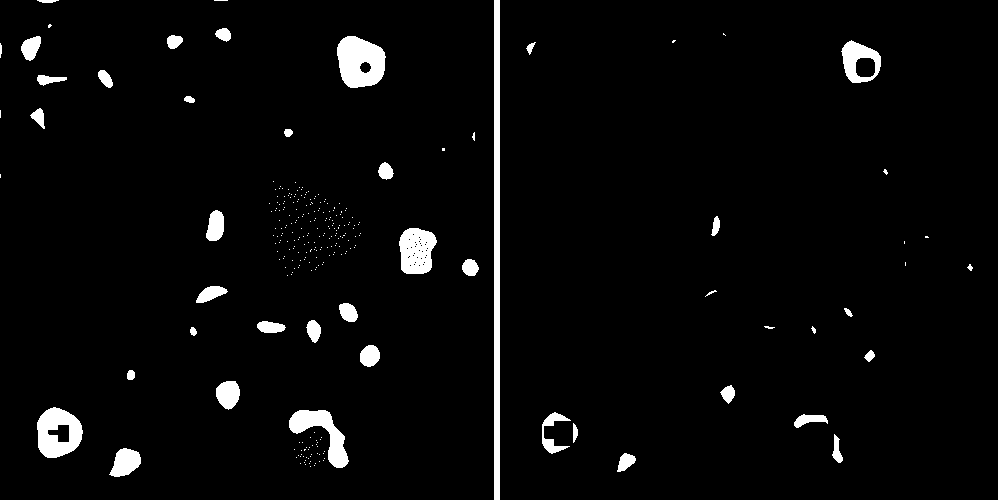

In [34]:
# porównanie obrazu oryginalnego i po operacji morfologicznej
frame = cv2.hconcat((img, img_erode))
#cv2_imshow(frame)
#plt.figure(figsize=(10,10))
plt.imshow(frame)

Jak widać operacja erozji powoduje zmniejszenie obiektów. Ponieważ zastosowane dwie iteracje operacji erozji z dość dużym elementem strukturalnym to zmniejszenie obiektów jest bardzo zauważalne. Ponadto, część małych obiektów zniknęła całkowicie. W zależności od zastosowania może to być efekt pozytywny lub nie.

## 1. b) dylacja

Dylatacja, czyli rozszerzanie, jest zastosowaniem sumy Minkowskiego do obrazu.  Jeżeli choć jeden piksel z sąsiedztwa objętego przez kernel ma wartość równą jeden, punkt centralny również otrzymuje wartość jeden. W przeciwnym wypadku przypisywane jest mu zero. 

Dylatacja służy do zamykania małych otworów oraz zatok we wnętrzu figury. Obiekty zwiększają swoją objętość i jeśli dwa lub więcej obiektów położonych jest blisko siebie, zrastają się w większe obiekty.

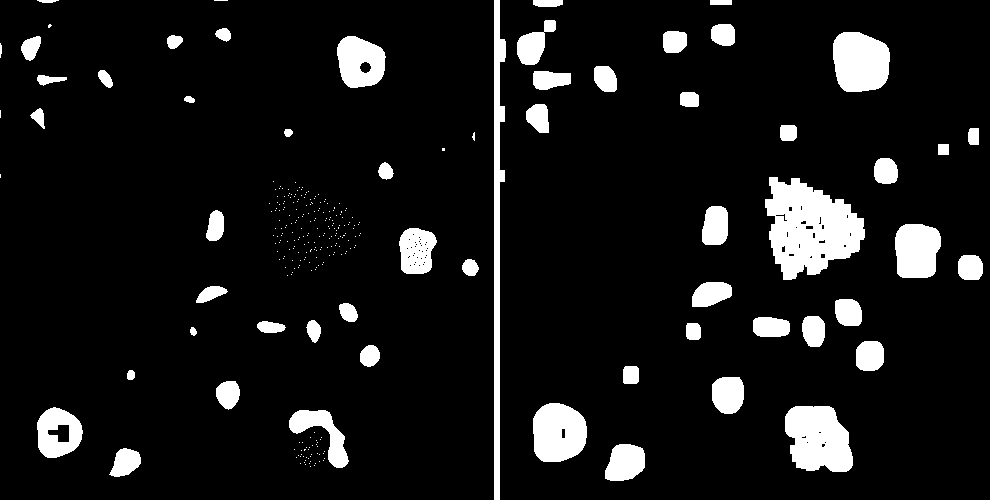

In [35]:
# wykonanie erozji morfologicznej przy użyciu zdefiniowanego elementu strukturalnego 
img_dilate = cv2.dilate(img, kernel, iterations = 2, borderType = cv2.BORDER_REPLICATE)

frame = cv2.hconcat((img, img_dilate))
#cv2_imshow(frame)
#plt.figure(figsize=(10,10))
plt.imshow(frame)


Jak widać operacja dylacji powoduje powiększenie obiektów. Należy zwrócić uwagę na kształt krawędzi obiektów który jest zależny od kształtu elementu strukturalnego. Im element strukturalny ma ostre krawędze tym bardziej "kanciaste" będą obiekty. Im bardziej element strukturalny przypomina koło tym bardziej obłe będą krawędzie obiektów.

## 1. c) otwarcie mofologiczne

Otwarcie morfologiczne jest równoważne nałożeniu operacji dylatacji na wynik erozji obrazu pierwotnego. Dzięki zastosowaniu dwóch podstawowych operacji w parze możliwe jest pozbycie się niedogodności związanej ze zmianą rozmiaru obiektów. 

Operacja otwarcia zachowuje rozmiary obiektów obrazu przy ich jednoczesnym wygładzeniu – usunięciu wszystkich „wystających” elementów. Często używana do usuwania małych obiektów (artefaktów/"śmieci") z obrazu.

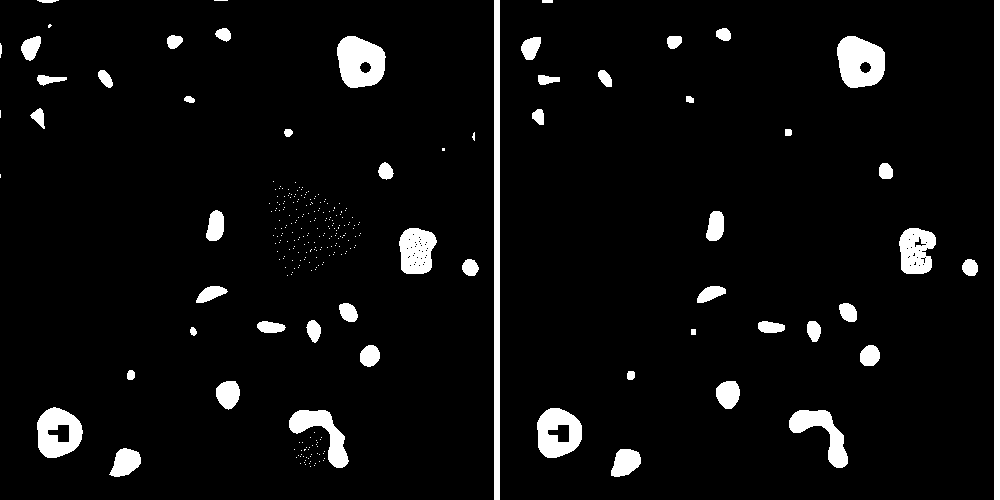

In [36]:
# wykonanie operacji otwarcia morfologicznego przy użyciu zdefiniowanego elementu strukturalnego 
img_open = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel, borderType = cv2.BORDER_REPLICATE)

frame = cv2.hconcat((img, img_open))
#cv2_imshow(frame)
#plt.figure(figsize=(10,10))
plt.imshow(frame)

## 1. d) zamknięcie morfologiczne

Operacja zamknięcia (czasem zwana domknięciem) morfologicznego jest równoważna nałożeniu operacji erozji na wynik dylatacji obrazu pierwotnego. Domknięcie usuwa z obrazu „dziury” oraz wklęsłości mniejsze od elementu strukturalnego. Uwaga, obietky mogą się połączyć.

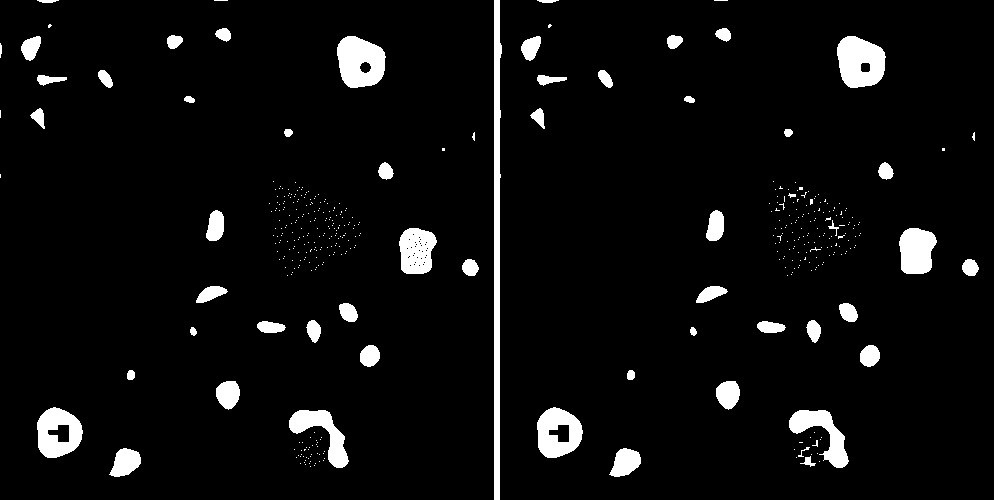

In [37]:
# wykonanie operacji zamknięcia morfologicznego przy użyciu zdefiniowanego elementu strukturalnego 
img_close = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel, borderType = cv2.BORDER_REPLICATE)

frame = cv2.hconcat((img, img_close))
#cv2_imshow(frame)
#plt.figure(figsize=(10,10))
plt.imshow(frame)

## Podsumowanie Zadania 1

Pisząc program należy pamiętać o tym że użytownik powinien mieć do wyboru kształt elementu strukturalnego jak i jego rozmiar. Należy również sprawdzić czy obraz jest binarny. W wyniku przeprowadzenia operacji morfologicznych uzyskujemy obraz o tym samym rozmiarze.

# Zadanie 2 operacje sąsiedztwa – filtracja dwu i jedno etapowa

Przyjmijmy sytuację w której mamy jedną maskę filtracji *mF* o rozmiarze 3x3 oraz drugą maskę filtracji *mG* o rozmiarze 3x3. Obraz wejściowy w naszych założeniach możemy uznać za dwuwymiarowy sygnał wejściowy *x*. Wynik kolejnej filtracji (kaskadowej) dwoma maskami możemy zapisać w ten sposób:

`y=mG∗(mF∗x)`

Ważną cechą (i wiele ułatwiającą w tym wypadku) konwolucji jest jej łączność. Dzięki temu powyższy zapis można przedstawić również tak:

`y=g∗(mF∗x)=(mG∗mF)∗x=mH∗x`

Gdzie: `mH = mG*mF = mF*mG`

Z tego wynika, że możliwe jest uzyskanie jednej maski filtracji, dającej ten sam efekt, przez konwolucję dwóch masek podstawowych.



In [38]:
# utworzenie pierwszej maski 3x3 - wygładzenie
mF = np.ones((3,3))
mF

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

In [39]:
# utworzenie drugiej maski 3x3 - wyostrzenie
mG = np.array([[1, -2, 1], 
               [-2, 4, -2], 
               [1, -2, 1]])
mG

array([[ 1, -2,  1],
       [-2,  4, -2],
       [ 1, -2,  1]])

In [40]:
# konstrukcja maski w oparciu o dwie powyższe maski 3x3 
# wykorzystanie konwolucji do wygenerowania maski 5x5
from scipy.signal import convolve2d as conv2 # funkcja konwolucji dwuwymiraowej
mH = conv2(mF, mG, mode='full') # mode full zapewnia odpowieni rozmiar maski
mH

array([[ 1., -1.,  0., -1.,  1.],
       [-1.,  1.,  0.,  1., -1.],
       [ 0.,  0.,  0.,  0.,  0.],
       [-1.,  1.,  0.,  1., -1.],
       [ 1., -1.,  0., -1.,  1.]])

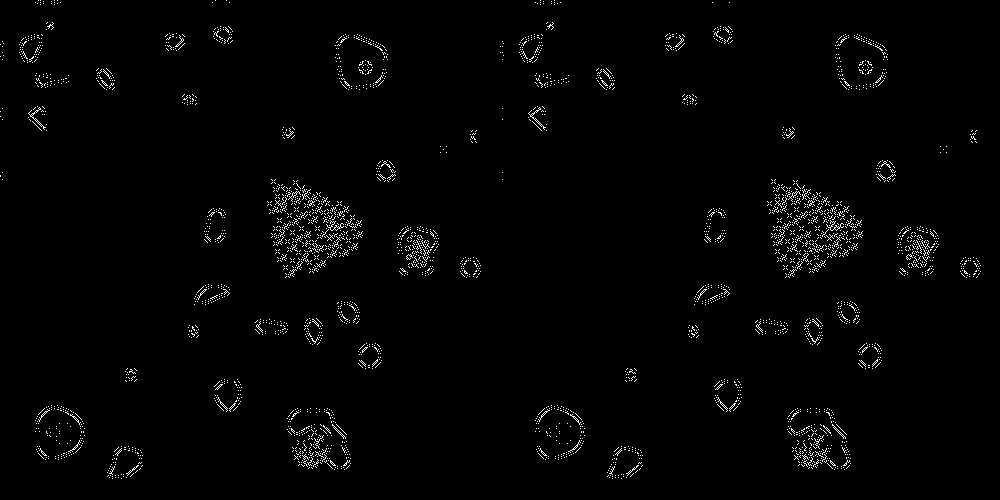

In [41]:
# wykonanie dwu etapowej filtracji z maskami 3x3 (jak w Lab3)
res_step1 = cv2.filter2D(img,cv2.CV_64F, mF, borderType = cv2.BORDER_REPLICATE)
res_step2 = cv2.filter2D(res_step1,cv2.CV_64F, mG, borderType = cv2.BORDER_REPLICATE)
#cv2_imshow(res_step22)

# wykonanie jednoetapowej filtracji z maską 5x5
res_5x5 = cv2.filter2D(img,cv2.CV_64F, mH, borderType = cv2.BORDER_REPLICATE)
#cv2_imshow(res_5x5)

# wizualne porównanie wyników
frame = cv2.hconcat((res_step2, res_5x5))
#cv2_imshow(frame)
#plt.figure(figsize=(10,10))
plt.imshow(frame)

W przedstawiony powyżej sposób możemy przekształcić dowolne dwie maski w jedną. Należy jednak pamiętać o tym że maska wynikowa ma inny rozmiar niż maski bazowe.

# Zadanie 3 Operacja szkieletyzacji (ścieniania)

Szkielet figury, to zbiór wszystkich punktów równoodległych od co najmniej dwóch brzegów. Szkielet odzwierciedla podstawowe własności topologiczne figury, a jego dalsza analiza może zostać wykorzystana do wielu celów.

Szkieletyzacja jest operacją wyznaczania liniowej reprezentacji (szkieletów) figur na analizowanym obrazie. Można ją wyznaczać między innymi przy użyciu operacji morfologicznych. Poniżej przedstawiona jest bardzo uproszczona implementacja.


---


ALGORYTM:
1.   Utworzenie pustego obrazu do przechowania szkieletu (*skel*).
2.   Wykonanie operacji otwarcia morfologicznego na obrazie oryginalnym, uzyskując *im_open*. 
3.   Odjęcie im_open od obrazu oryginalnego, uzyskując *im_temp*.
4.   Wykonanie operacji erozji na oryginalnym obrazie oraz poprawienie szkieletu przez obliczenie części wspólnej *im_temp* oraz aktualnego szkieletu.
5.   Powtórzenie kroków 2-4 aż obraz oryginalny będzie pusty (kompletnie zerodowany).




In [42]:
# Krok 1
size = np.size(img)
skel = np.zeros(img.shape, np.uint8)
im_copy = img.copy()

# utoworzenie kernela
element = cv2.getStructuringElement(cv2.MORPH_CROSS, (3,3))

In [43]:
# Pętla obejmująca kroki 2-4
while True:
    #Krok 2: Otwarcie morfologiczne
    im_open = cv2.morphologyEx(im_copy, cv2.MORPH_OPEN, element)
    #Krok 3: Odjęcie powyższego wyniku od obrazu oryginalnego
    im_temp = cv2.subtract(im_copy, im_open)
    #Krok 4: 
    #erozja morfologiczna
    im_eroded = cv2.erode(im_copy, element)
    # aktualizacja szkieletu
    skel = cv2.bitwise_or(skel,im_temp)
    # aktualizacja obrazu przetwarzanego
    im_copy = im_eroded.copy()
    #cv2_imshow(im_copy)                                                        # Odkomentuj jeśli chcesz zobaczyć kolejne kroki - uwaga wiele obrazów

    #Krok 5: Przetwij pętlę jeśli nie ma już obiektów w obrazie
    if cv2.countNonZero(im_copy)==0:
        break


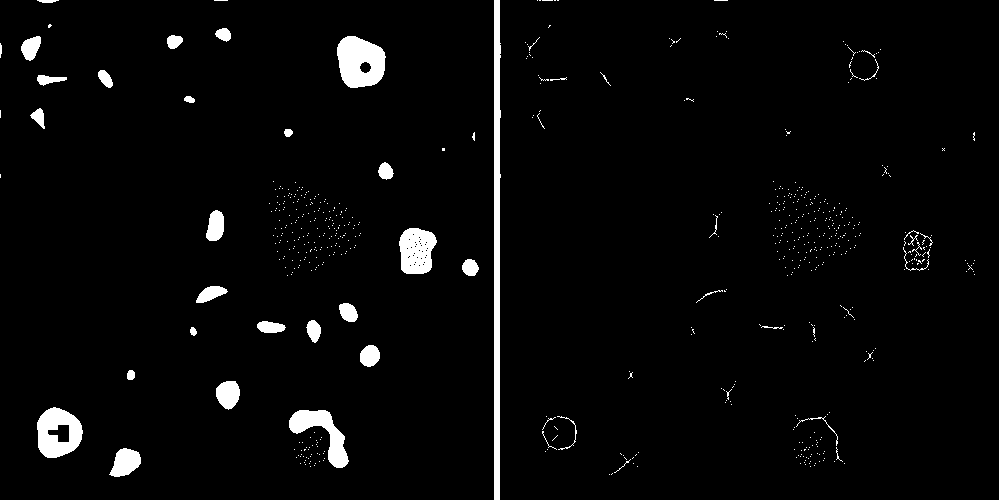

In [44]:
# wizualne porównanie wyników
frame = cv2.hconcat((img, skel))
#cv2_imshow(frame)
#plt.figure(figsize=(10,10))
plt.imshow(frame)

Pisząc program należy sprawdzić czy obraz wejściowy jest binarny. W wyniku przeprowadzenia operacji szkieletyzacji uzyskujemy obraz o tym samym rozmiarze.

# Zadanie Dodatkowe czyli po co operacje morfologiczne?

## Prezentacja obiektów

Załóżmy, że dany obraz 'A1_result.bmp' jest wynikiem segmentacji testowanego nowego algorytmu segmentacji (prawie zgodne z prawdą - dodałem trochę dziur i szumu dla lepszego efektu op. morfologicznych). Chcemy na podstawie tej maski binarnej zaprezentować jedynie znalezione obiekty w obrazie 'A1.bmp'. Można do tego celu wykorzystać operacje morfologiczne i operacje jednopunktowe dwuargumentowe.

In [45]:
# element strukturalny o kształcie kwadratu 5x5
strel1 = cv2.getStructuringElement(cv2.MORPH_RECT,(5,5))

# wykonanie operacji otwarcia morfologicznego przy użyciu zdefiniowanego elementu strukturalnego 
img_open2 = cv2.morphologyEx(img, cv2.MORPH_OPEN, strel1, borderType = cv2.BORDER_REPLICATE)

# wykonanie operacji dylacji czyli powiększenia obiektów przy użyciu elementu strukturalnego o kształcie elipsy, bo zależy nam na obłych krawędziach
img_dilate2 = cv2.dilate(img_open2, cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5)), borderType = cv2.BORDER_REPLICATE)


Należy załadować plik 'A1.bmp'.

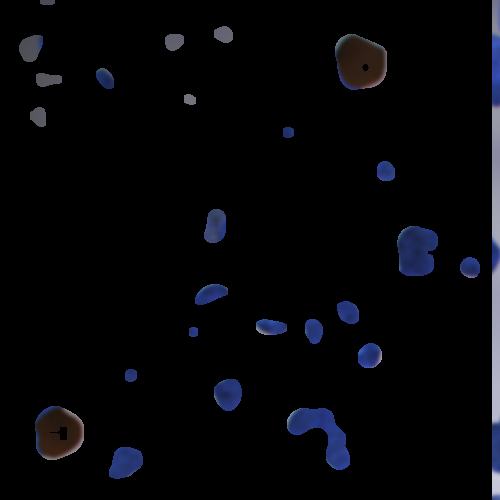

In [47]:
img_color = cv2.imread('A1.bmp', cv2.IMREAD_COLOR)

mask = img_dilate2.reshape(*img_dilate2.shape, 1) /255

#img_result = cv2.bitwise_and(img_color, img_dilate2)
img_result = img_color * mask

#cv2_imshow(img_result)
#plt.figure(figsize=(10,10))
plt.imshow(img_result)

## Krawędzie obiektów

Dzięki operacjom morfologicznym można również w łatwy sposób uzyskać krawedzie znalezionych obiektów. Odpowiednio dobranym elementem strukturalnym kontrolujemy grubość krawędzi.

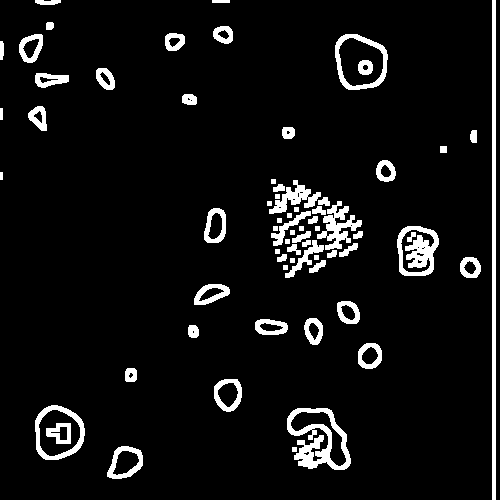

In [48]:
# element strukturalny o kształcie kwadratu 5x5
strel3 = cv2.getStructuringElement(cv2.MORPH_RECT,(5,5))
# wykonanie operacji dylacji 
img_dilate3 = cv2.dilate(img, strel3, borderType = cv2.BORDER_REPLICATE)
# wykonanie operacji erozji
img_erode3 = cv2.erode(img, strel3, borderType = cv2.BORDER_REPLICATE)
# uzyskanie obrazu krawędzi przez różnicę powyższych rezultatów
img_result3 = img_dilate3 - img_erode3

#cv2_imshow(img_result3)
#plt.figure(figsize=(10,10))
plt.imshow(img_result3)

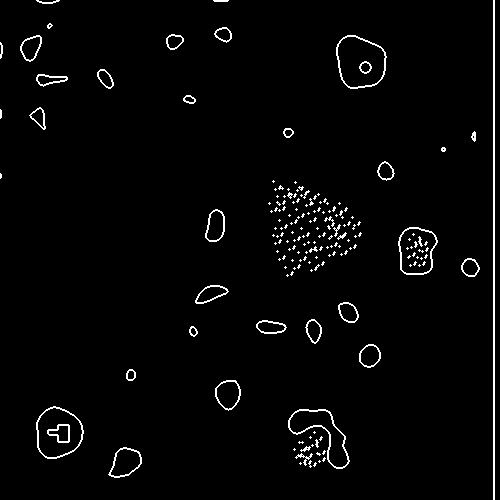

In [49]:
# element strukturalny o kształcie krzyża 3x3
strel3 = cv2.getStructuringElement(cv2.MORPH_CROSS,(3,3))
# wykonanie operacji dylacji 
img_dilate3 = cv2.dilate(img, strel3, borderType = cv2.BORDER_REPLICATE)
# wykonanie operacji erozji
img_erode3 = cv2.erode(img, strel3, borderType = cv2.BORDER_REPLICATE)
# uzyskanie obrazu krawędzi przez różnicę powyższych rezultatów
img_result3 = img_dilate3 - img_erode3

#cv2_imshow(img_result3)
#plt.figure(figsize=(10,10))
plt.imshow(img_result3)